In [2]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Gradients

Formally, an image gradient is defined as a ***directional change in image intensity***.



### Sobel Kernels

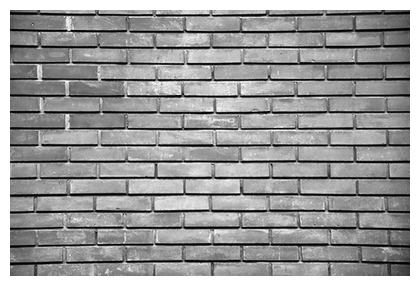

In [2]:
image = cv2.imread("images/bricks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(gray, flip=False, cmap="gray")

In [4]:
# compute gradients along x and y axis
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

In [5]:
# the `gX` and `gY` images are now of the floating point data type,
# so we need to take care to convert them back to an unsigned 8-bit
# integer representation so other OpenCV functions can utilize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

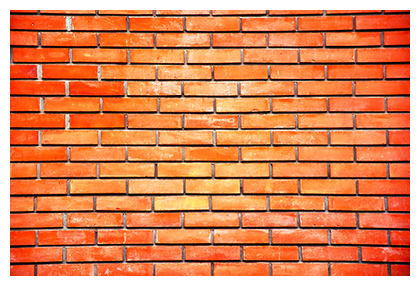

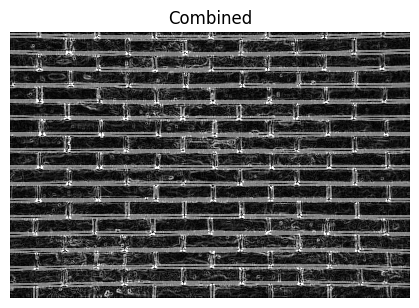

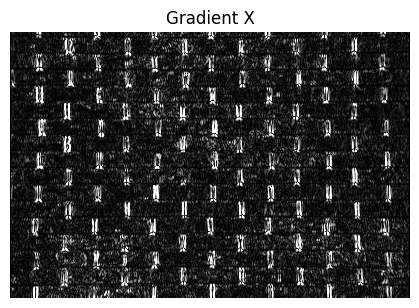

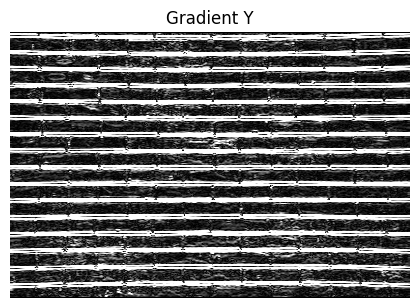

In [9]:
display(image)
sobel_combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
display(sobel_combined, flip=False, cmap="gray", title="Combined")
display(gX, flip=False, cmap="gray", title="Gradient X")
display(gY, flip=False, cmap="gray", title="Gradient Y")

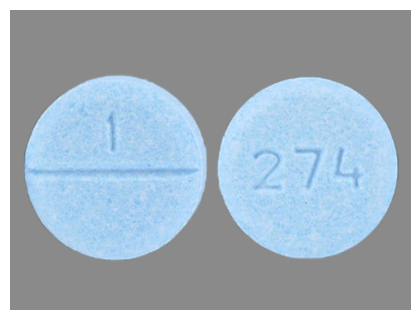

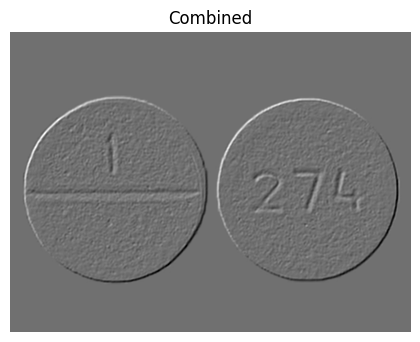

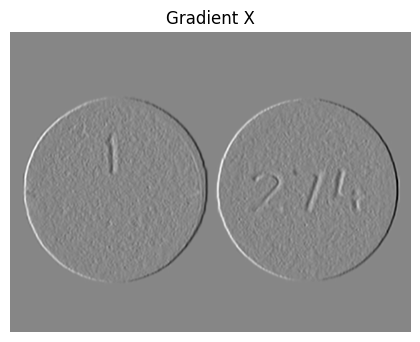

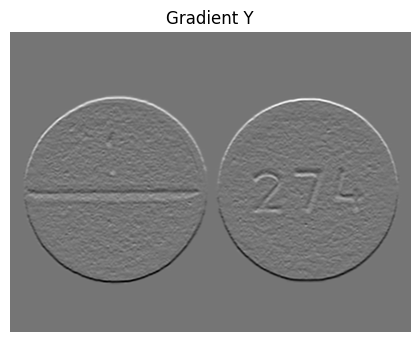

In [12]:
## another image 
image = cv2.imread("images/clonazepam_1mg.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute gradients
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# combine
sobel_combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# display
display(image)
display(sobel_combined, flip=False, cmap="gray", title="Combined")
display(gX, flip=False, cmap="gray", title="Gradient X")
display(gY, flip=False, cmap="gray", title="Gradient Y")

### Gradient orientation and magnitude in OpenCV


In [14]:
image = cv2.imread("images/coins02.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate gradients across X and Y axes
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

In [16]:
# compute the magnitude of gradient and orientation 'theta'
magnitude = np.sqrt((gX**2) + (gY**2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

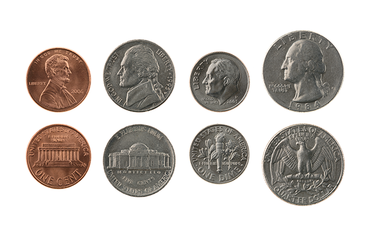

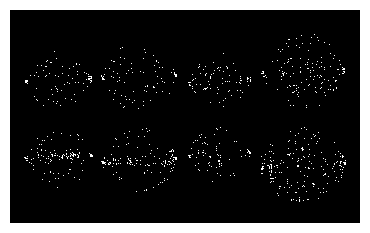

In [21]:
lower_angle = 175.0
upper_angle = 180.0

# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= lower_angle, orientation, -1)
idxs = np.where(orientation <= upper_angle, idxs, -1)

# mask
mask = np.zeros(gray.shape, dtype="uint8")
# all coordinates that have a corresponding idxs  value of > -1 are set to 255 (i.e. foreground).
# Otherwise, they are left as 0 (i.e. background).
mask[idxs > -1] = 255

display(image)
display(mask, flip=False, cmap="gray")

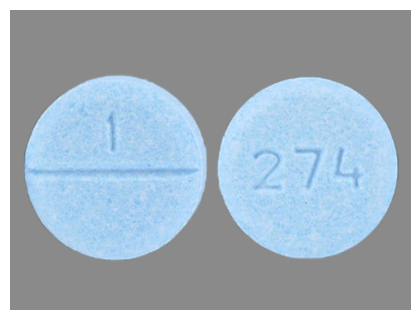

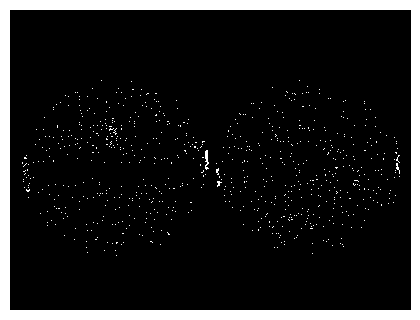

In [22]:
# another image

image = cv2.imread("images/clonazepam_1mg.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate gradients across X and Y axes
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# compute the magnitude of gradient and orientation 'theta'
magnitude = np.sqrt((gX**2) + (gY**2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

lower_angle = 175.0
upper_angle = 180.0

# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= lower_angle, orientation, -1)
idxs = np.where(orientation <= upper_angle, idxs, -1)

# mask
mask = np.zeros(gray.shape, dtype="uint8")
# all coordinates that have a corresponding idxs  value of > -1 are set to 255 (i.e. foreground).
# Otherwise, they are left as 0 (i.e. background).
mask[idxs > -1] = 255

display(image)
display(mask, flip=False, cmap="gray")

In [67]:

gX = 23
gY = 319.0
# compute the magnitude of gradient and orientation 'theta'
magnitude = np.sqrt((gX**2) + (gY**2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
orientation

85.8760924396844

In [ ]:
m = np.asarray([[44, 67, 96], [231, 184, 224], [51, 253, 36]], dtype="uint8")
m.shape
m

In [56]:

gy = cv2.Sobel(m, ddepth=cv2.CV_64F, dx=0, dy=1)
m.shape

(3, 3)

In [57]:
gy.sum()

957.0

In [58]:
gx = cv2.Sobel(m, ddepth=cv2.CV_64F, dx=1, dy=0)

In [59]:
gx.sum()

69.0